In [15]:
import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


UNDERSTANDING DATASET

In [16]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

DATA CLEANING

In [17]:
# Fill Age with median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill Embarked with mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Drop Cabin (too many missing)
df = df.drop("Cabin", axis=1)


In [18]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_12984\4243202571.py:2: SyntaxWarning: invalid escape sequence '\.'
  df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)


ENCODING

In [19]:
df["Sex"] = df["Sex"].map({"male":0, "female":1})

df = pd.get_dummies(df, columns=["Embarked", "Title"], drop_first=True)


DROP UNNECESSARY COLUMNS

In [20]:
df = df.drop(["Name", "Ticket", "PassengerId"], axis=1)


VISUALIZATIONS -> EXPLORATORY ANALYSIS

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
# reload and preprocess data to ensure all features exist
import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")

# Cleaning
# Fill Age with median
if df["Age"].isnull().any():
    df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill Embarked with mode
if df["Embarked"].isnull().any():
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Drop Cabin (too many missing)
df = df.drop("Cabin", axis=1)

# Feature engineering
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# create Title from name for analysis and modeling
df["Title"] = df["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)

# keep a copy before any encoding so we can visualize the original "Title" column
# (encoding will create dummy columns and remove the base Title)
df_vis = df.copy()

# Encoding
# map gender to numeric
df["Sex"] = df["Sex"].map({"male":0, "female":1})
# convert Embarked and Title categories to dummies (Title needed for modeling)
df = pd.get_dummies(df, columns=["Embarked", "Title"], drop_first=True)

# Drop unnecessary columns after Title has been derived
df = df.drop(["Name", "Ticket", "PassengerId"], axis=1)

print("Data reloaded and preprocessed for visualization")


Data reloaded and preprocessed for visualization


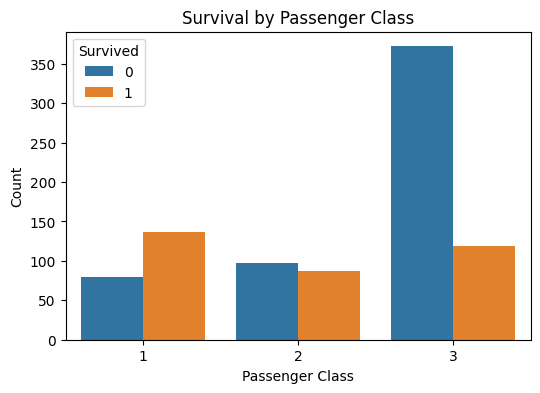

In [23]:
# Survival Vs Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()


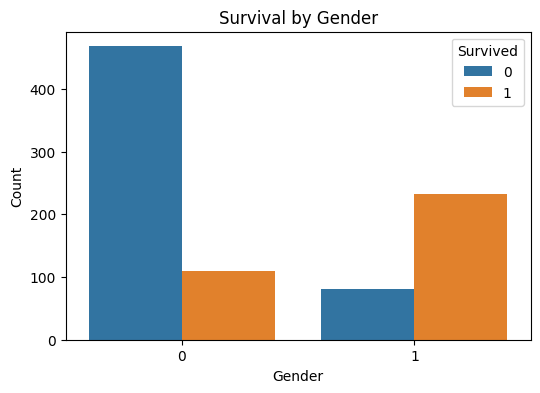

In [24]:
# Survival Vs Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


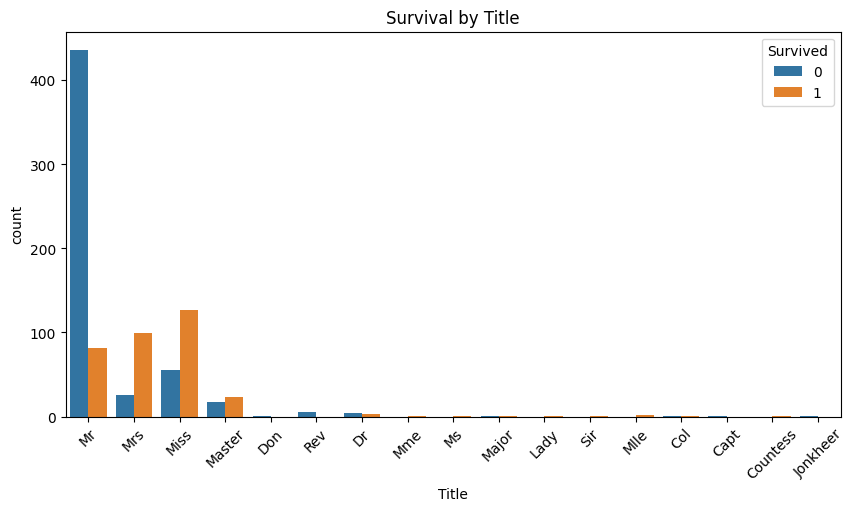

In [25]:
# Survival Vs Title
plt.figure(figsize=(10,5))
# use the copy that still has the raw Title column
sns.countplot(x="Title", hue="Survived", data=df_vis)
plt.xticks(rotation=45)
plt.title("Survival by Title")
plt.show()


MODEL

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


HYPERPARAMETER TUNING

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# ensure training/test split exists
if 'X_train' not in globals():
    from sklearn.model_selection import train_test_split
    X = df.drop("Survived", axis=1)
    y = df["Survived"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    "n_estimators": [100, 200],
    "max_depth": [4, 6, 8],
    "min_samples_split": [2, 5]
}

# diagnostic output before fitting
print("X_train dtypes:\n", X_train.dtypes)
print("Null counts in X_train:\n", X_train.isnull().sum())

# coerce to numeric just in case
X_train = X_train.apply(pd.to_numeric, errors='coerce')
print("After coercion, null counts in X_train:\n", X_train.isnull().sum())

# fill or drop NaNs if any remain
if X_train.isnull().any().any():
    print("Filling remaining NaNs with column medians")
    X_train = X_train.fillna(X_train.median())

# also check y_train type
print("y_train dtype:", y_train.dtype)
if y_train.dtype == 'object':
    y_train = pd.to_numeric(y_train, errors='coerce')
    print("Converted y_train to numeric, nulls:", y_train.isnull().sum())


grid = GridSearchCV(RandomForestClassifier(), params, cv=5)
try:
    grid.fit(X_train, y_train)
except Exception as e:
    print("Error during grid fit:", repr(e))
    # re-raise to keep notebook behavior
    raise

best_model = grid.best_estimator_


X_train dtypes:
 Pclass              int64
Sex                 int64
Age               float64
SibSp               int64
Parch               int64
Fare              float64
FamilySize          int64
Embarked_Q           bool
Embarked_S           bool
Title_Col            bool
Title_Countess       bool
Title_Don            bool
Title_Dr             bool
Title_Jonkheer       bool
Title_Lady           bool
Title_Major          bool
Title_Master         bool
Title_Miss           bool
Title_Mlle           bool
Title_Mme            bool
Title_Mr             bool
Title_Mrs            bool
Title_Ms             bool
Title_Rev            bool
Title_Sir            bool
dtype: object
Null counts in X_train:
 Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
FamilySize        0
Embarked_Q        0
Embarked_S        0
Title_Col         0
Title_Countess    0
Title_Don         0
Title_Dr          0
Title_Jonkheer    0
Title_Lady    

CROSS-VALIDATION

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X, y, cv=5)
print("Mean CV Score:", scores.mean())


Mean CV Score: 0.8271420500910175


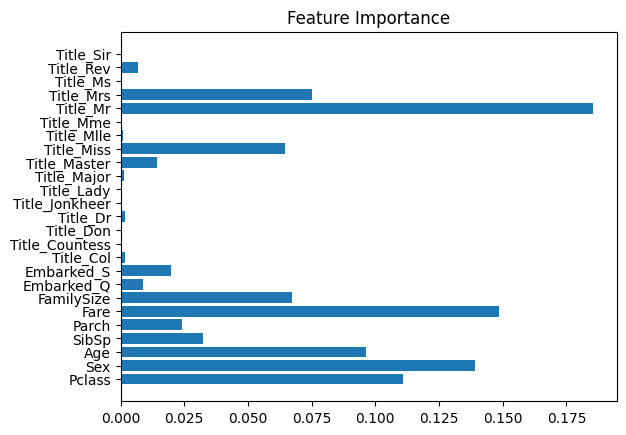

In [ ]:
import matplotlib.pyplot as plt

plt.barh(X.columns, best_model.feature_importances_)
plt.title("Feature Importance")
plt.show()


SHAP

In [32]:
import shap


C:\Users\KIIT0001\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
# make sure grid exists and is fitted before retrieving best model
need_fit = False
if 'grid' not in globals():
    need_fit = True
else:
    # grid exists but may not have been fitted
    if not hasattr(grid, 'best_estimator_'):
        need_fit = True

if need_fit:
    # recompute training set in case data was updated
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    X = df.drop("Survived", axis=1)
    y = df["Survived"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    params = {
        "n_estimators": [100, 200],
        "max_depth": [4, 6, 8],
        "min_samples_split": [2, 5]
    }
    grid = GridSearchCV(RandomForestClassifier(), params, cv=5)
    # diagnostic information before fitting
    print("=== grid fitting diagnostics ===")
    print(X_train.dtypes)
    print("Null counts per column:\n", X_train.isnull().sum())
    try:
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print("Created and fit grid; best_model set")
    except Exception as e:
        print("Grid fitting failed:", type(e), e)
        raise
else:
    best_model = grid.best_estimator_



SHAP works best with tree-based models like:

Random Forest

XGBoost

Gradient Boosting

In [34]:

# compute shap values using TreeExplainer (re-added in fresh cell to avoid malformed earlier cell)
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
print("SHAP values computed")


SHAP values computed


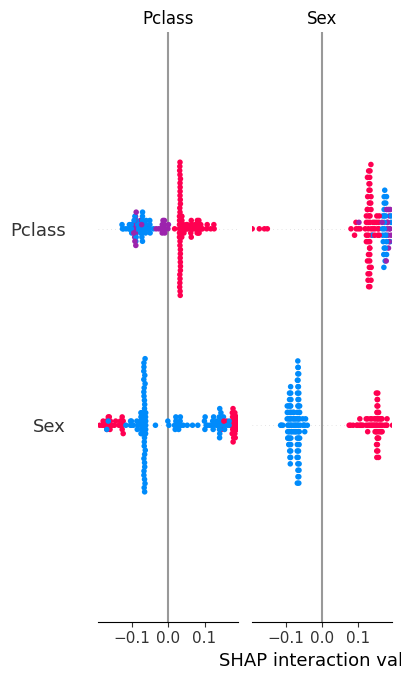

In [35]:
shap.summary_plot(shap_values, X_test)


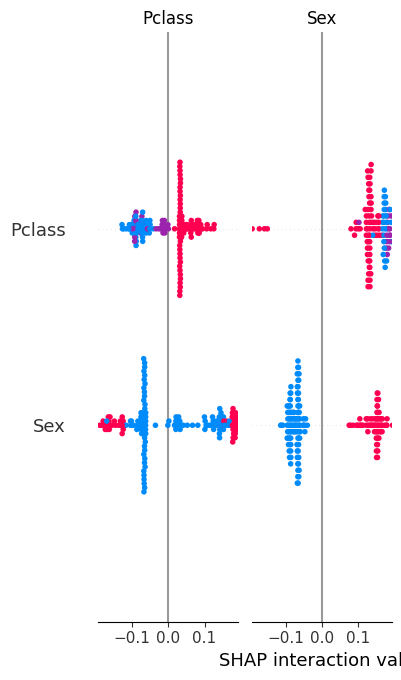

In [36]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


INSIGHTS

-> Gender, passenger class, and title were the most influential factors in predicting survival.

-> Higher fares and first-class status increased survival probability.